# Tutorial: Load and Sample Datasets

In this tutorial you will learn what are the different ways to load datasets, subsample them.

To run all cells, you need the `annotated-trainval` and `synthetic` datasets unzipped in `data/docile`.

In [1]:
!pwd

/Users/saucabadal/SiaTests/docile/tutorials


In [2]:
from pathlib import Path
from docile.dataset import CachingConfig, Dataset
from PIL import Image

DATASET_PATH = Path("../data/docile/")

## Load from folder with unzipped dataset

By default, dataset is loaded with these settings:

* annotations and pre-computed OCR are loaded to memory
* images generated from PDFs are cached to disk (for faster access of the images in future iterations)

Below you see options how to change this default behaviour, which is especially useful for large datasets.

In [3]:
# Do NOT preload annotations, pre-computed OCR, nor document resources
trainval = Dataset("trainval", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)
train = Dataset("train", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)
val = Dataset("val", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)
synthetic = Dataset("synthetic", DATASET_PATH, load_annotations=False, load_ocr=False, cache_images=CachingConfig.OFF)

Initializing documents for docile:synthetic: 100%|█████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 40182.14it/s]


## Sample documents

For experiments and to work with large datasets, it can be useful to take samples of the datasets.

For this, you can use slicing `[start:end:step]`, `.sample()`, `.get_cluster()` or `.from_documents()` methods.

Document(docile:003568b1286f4dab953fc2d5)
Number of pages: 2


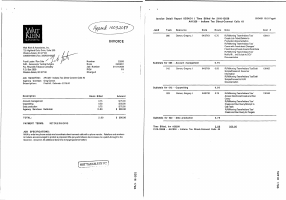

In [10]:
doc_idx = 4
dataset = trainval
sample_doc_trainval = dataset[doc_idx]
print(sample_doc_trainval)
print(f'Number of pages: {sample_doc_trainval.page_count}')
#sample_doc_trainval.page_image(page=0, image_size=(400, None))

imgs = [sample_doc_trainval.page_image(page=p, image_size=(None, 200)) for p in range(sample_doc_trainval.page_count)]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 200))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width
concat_img

**Documents belonging to the same cluster**

Found 14 documents in trainval belonging to the same cluster as synthetic-04cb9c50d4c949598689ea6f-000
Cluster: Dataset(docile:trainval[cluster_id=853])
Showing 10 images (first page of each document) from the cluster:


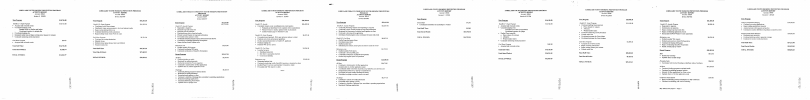

In [13]:
# Synthetic document has 100 chunks of 1000 documents from the same template document,
# i.e., documents from 0 to 999 belong to the first document template, 
#       documents from 1000 to 1999 belong to the second document template, and so on.

doc_idx = 1000
trainval_cluster = trainval.get_cluster(synthetic[doc_idx].annotation.cluster_id)

from PIL import Image

print(f'Found {len(trainval_cluster)} documents in trainval belonging to the same cluster as {synthetic[doc_idx].docid}')
print(f'Cluster: {trainval_cluster}')
print("Showing 10 images (first page of each document) from the cluster:")
imgs = [doc.page_image(page=0, image_size=(None, 100)) for doc in trainval_cluster[:10]]
concat_img = Image.new("RGB", (sum(img.width for img in imgs), 100))
start_from = 0
for img in imgs:
    concat_img.paste(img, (start_from, 0))
    start_from += img.width
concat_img